In [83]:
!pip install xgboost

     |████████████████████████████████| 148.9 MB 175 kB/s  eta 0:00:01    |█████████████████               | 79.5 MB 2.3 MB/s eta 0:00:31     |██████████████████▊             | 87.2 MB 20.6 MB/s eta 0:00:04     |███████████████████▏            | 89.3 MB 20.6 MB/s eta 0:00:03     |██████████████████████████████▎ | 141.0 MB 23.8 MB/s eta 0:00:01


In [1]:
!pip install umap-learn
!pip install umap-learn[plot]

     |████████████████████████████████| 69 kB 1.4 MB/s eta 0:00:011
     |████████████████████████████████| 3.1 MB 5.1 MB/s eta 0:00:01
     |████████████████████████████████| 24.6 MB 93 kB/s  eta 0:00:01     |████████████████████████▊       | 19.0 MB 2.6 MB/s eta 0:00:03
  Created wheel for umap-learn: filename=umap_learn-0.4.6-py3-none-any.whl size=67950 sha256=d20c975f412a3e4293efd46b4292f04a8c75705d189f1642091902aba97cfc2c
  Stored in directory: /home/kongkitimanonk/.cache/pip/wheels/9c/18/d0/2bcf7df75d19c6ca6ff8097b12abd4c46879e9a8275e93e651
Successfully built umap-learn
     |████████████████████████████████| 8.8 MB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 15.5 MB 21.8 MB/s eta 0:00:01
     |████████████████████████████████| 4.2 MB 7.5 MB/s eta 0:00:01     |████████████▉                   | 1.7 MB 7.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 4.4 MB/s eta 0:00:01
     |███

In [15]:
from multiscorer.multiscorer import MultiScorer
#Scikit's libraries for demonstration
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, log_loss, roc_auc_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection  import GridSearchCV
from sklearn.svm import SVC 
from numpy import average
import pickle5 as pickle

# GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
# We'll use matplotlib for graphics.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# We import seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

import umap
import umap.plot


In [5]:
import pickle5 as pickle
with open( "/home/ubuntu/data/AMPsNonAMPs_df.plk", 'rb') as file:
    AMPs_df = pickle.load(file)

In [ ]:
#AMPs_df = pd.read_pickle('../../datasets/AMPsNonAMPs_df.239.plk')
AMPs_df = pd.read_pickle('/home/ubuntu/data/AMPsNonAMPs_df.plk')
AMPs_df

In [6]:
AMPs_df.drop_duplicates(subset=['Sequence'],inplace=True)
AMPs_df

,ID,Sequence,length,class,reps
0,EN92515250|C|B3FJD7|phage 201phi2-1 lysin,MAKKSVPLRKPAGSDGQGNIKVPGGPVVLDLGDFDDIFGPMESESP...,2337,0,"[0.0032203220762312412, 0.07328620553016663, 0..."
1,EN54061055|C|F8SJ56|phage PhiPA3 lysin,MASKKTTLPKPKGINPQGSIVQLDLDDFDDLFDEDFGLPKKNSPYT...,2319,0,"[0.0027930964715778828, 0.06916013360023499, 0..."
2,EN4815120|C|Q8SCY1|phage phiKZ lysin,MAKKVTLPKGQTGATGTTLGQAGNILDLSDVDDIFGDTPKAKKGSP...,2237,0,"[0.0023172732908278704, 0.05406315624713898, 0..."
3,EN3016141|D|D2J8A7|bacteriocin,MAETIKGLRIDLSLKDMGVGRSITELKRSFRTLNSDLKVSSKNFEY...,1619,0,"[0.014644640497863293, 0.07187927514314651, 0...."
4,EN9175723|BD|Q93IM3|bacteriocin,MAKKKNTYKVPSIIALTLAGTALTTHHAQAADKTQDQSTNKNILND...,1564,0,"[0.0062357354909181595, 0.01848522014915943, 0..."
...,...,...,...,...,...
42439,UniRef50_B2ABU5 Podospora anserina S mat+ geno...,MKWKAIIAAYGM,12,1,"[0.04739842936396599, 0.01943567767739296, -0...."
42440,UniRef50_A0A151HEL5 Zinc finger C3HC4 type (R...,GLYFRPRRRASS,12,1,"[0.0483490452170372, -0.007824046537280083, -0..."
42441,UniRef50_K2MU79 Retrotransposon hot spot (RHS)...,MESNPMTLVGCG,12,1,"[0.047337695956230164, -0.013988062739372253, ..."
42442,UniRef50_A0A1E1IUT2 Flagellar calcium-binding ...,IRCVGHWMQAEH,12,1,"[0.04697670415043831, -0.027571065351366997, -..."


In [7]:
X= np.array(AMPs_df['reps'].to_list())
y= np.array(AMPs_df['class'].to_list())

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [9]:
def confusion_Matrix(classifier, X_test, y_test):
    class_names = ['AMPs', 'NonAMPs']

    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                display_labels = class_names,
                                cmap=plt.cm.Blues, xticks_rotation='vertical')

    disp.ax_.set_title(" Confusion Matrix")

    print(disp.confusion_matrix)
    plt.grid(False)
    plt.show()

def create_roc_curve(Y, probabilities, class_lookup, title, ax):
    '''Create ROC curve to compare multiclass model performance.
    Parameters:
        Y (numpy.array): Truth labels
        probabilities (numpy.array): Output of model for each class
        class_lookup (dict): lookup hash of truth labels
        title (str): Plot title
    '''
    n_classes = Y.shape[1]
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    ax.set_title(title)
    if n_classes == 3:
        colors = cycle(['orange', 'red', 'black'])
    else:
        colors = cycle(['orange', 'red', 'aqua', 'black'])
    for i, color in zip(range(n_classes), colors):
        fpr[i], tpr[i], _ = metrics.roc_curve(Y[:, i], probabilities[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])
        ax.plot(fpr[i], tpr[i], color=color,
                label='ROC curve of class {0} (area = {1:0.2f})'.format(
                    class_lookup[i], roc_auc[i]))
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0, 1.0])
    ax.set_ylim([0.0, 1.0])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc="lower right")
    # plt.show()

# K-Means Clustering

# UMP

<AxesSubplot:>

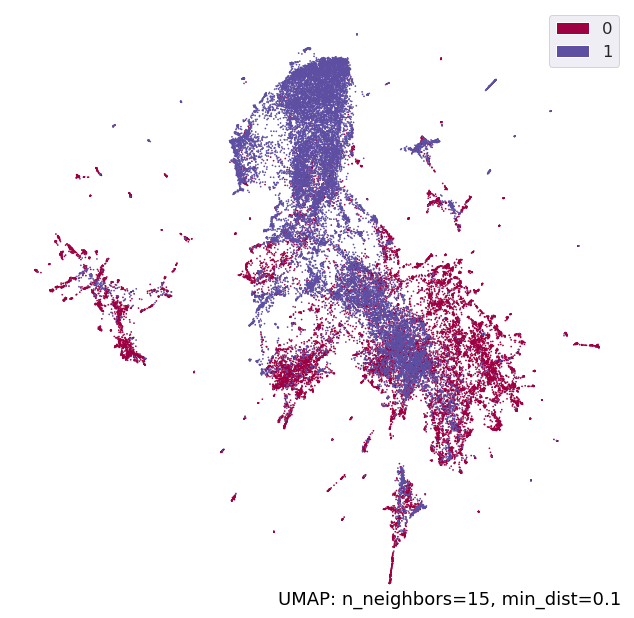

In [15]:
mapper = umap.UMAP().fit(X)
umap.plot.points(mapper, labels=y)

In [16]:
mapper = umap.UMAP(n_neighbors=300).fit(X)
umap.plot.points(mapper, labels=y)

NameError: name 'umap' is not defined

# RF

In [11]:
from sklearn.ensemble import RandomForestClassifier 
RFclassifier = RandomForestClassifier ( random_state=42)

In [ ]:

RFclassifier.fit(X_train, y_train)
y_pred = RFclassifier.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      4264
           1       0.91      0.90      0.91      4127

    accuracy                           0.91      8391
   macro avg       0.91      0.91      0.91      8391
weighted avg       0.91      0.91      0.91      8391

0.9077583124776546


[[3887  377]
 [ 397 3730]]


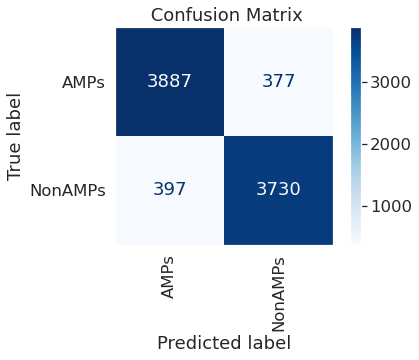

In [20]:
confusion_Matrix(RFclassifier, X_test, y_test)

In [19]:
score = cross_val_score(RFclassifier, X, y, scoring='accuracy', cv=10,n_jobs=10,).mean()#
print('Cross-Validation Accuracy:', score, '\n', '\n')

Cross-Validation Accuracy: 0.8219168888924238 
 



In [2]:
with open("/home/ubuntu/data/AMPsNonAMPs_df.4plk", 'rb') as f:
    AMPs_df = pickle.load(f)
AMPs_df

,ID,Sequence,length,class,reps
0,EN92515250|C|B3FJD7|phage 201phi2-1 lysin,MAKKSVPLRKPAGSDGQGNIKVPGGPVVLDLGDFDDIFGPMESESP...,2337,0,"[0.0032203220762312412, 0.07328620553016663, 0..."
1,EN54061055|C|F8SJ56|phage PhiPA3 lysin,MASKKTTLPKPKGINPQGSIVQLDLDDFDDLFDEDFGLPKKNSPYT...,2319,0,"[0.0027930964715778828, 0.06916013360023499, 0..."
2,EN4815120|C|Q8SCY1|phage phiKZ lysin,MAKKVTLPKGQTGATGTTLGQAGNILDLSDVDDIFGDTPKAKKGSP...,2237,0,"[0.0023172732908278704, 0.05406315624713898, 0..."
3,EN3016141|D|D2J8A7|bacteriocin,MAETIKGLRIDLSLKDMGVGRSITELKRSFRTLNSDLKVSSKNFEY...,1619,0,"[0.014644640497863293, 0.07187927514314651, 0...."
4,EN9175723|BD|Q93IM3|bacteriocin,MAKKKNTYKVPSIIALTLAGTALTTHHAQAADKTQDQSTNKNILND...,1564,0,"[0.0062357354909181595, 0.01848522014915943, 0..."
...,...,...,...,...,...
42439,UniRef50_B2ABU5 Podospora anserina S mat+ geno...,MKWKAIIAAYGM,12,1,"[0.04739842936396599, 0.01943567767739296, -0...."
42440,UniRef50_A0A151HEL5 Zinc finger C3HC4 type (R...,GLYFRPRRRASS,12,1,"[0.0483490452170372, -0.007824046537280083, -0..."
42441,UniRef50_K2MU79 Retrotransposon hot spot (RHS)...,MESNPMTLVGCG,12,1,"[0.047337695956230164, -0.013988062739372253, ..."
42442,UniRef50_A0A1E1IUT2 Flagellar calcium-binding ...,IRCVGHWMQAEH,12,1,"[0.04697670415043831, -0.027571065351366997, -..."


In [13]:

scorer = MultiScorer({
  'accuracy': (accuracy_score, {}),
  'precision': (precision_score, {}),
  'recall': (recall_score, {}),
  'f1': (f1_score, {}), 
  'roc_auc': (roc_auc_score, {}),
  'neg_log_loss': (log_loss, {}), 
})
kfold = StratifiedKFold(n_splits=10, shuffle=True)
cross_val_score(RFclassifier, X, y, cv=kfold, scoring=scorer )

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

In [14]:
# new
results = scorer.get_results()
for metric in results.keys():
  print("%s: %.3f" % (metric, average(results[metric])))

accuracy: 0.908
precision: 0.908
recall: 0.905
f1: 0.907
roc_auc: 0.908
neg_log_loss: 3.181


In [16]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scoring = ['accuracy', 'f1', 'roc_auc', 'recall', 'precision','neg_log_loss']
scores = cross_validate(
    RFclassifier, X, y, scoring=scoring, cv=kfold, return_train_score=True)
print("Accuracy TEST: %0.2f (+/- %0.2f) Accuracy TRAIN: %0.2f (+/- %0.2f)" %
      (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2, scores['train_accuracy'].mean(), scores['train_accuracy'].std() * 2))
print("F1 TEST: %0.2f (+/- %0.2f) F1 TRAIN : %0.2f (+/- %0.2f) " %
      (scores['test_f1'].mean(), scores['test_f1'].std() * 2, scores['train_f1'].mean(), scores['train_f1'].std() * 2))
print("AUROC TEST: %0.2f (+/- %0.2f) AUROC TRAIN : %0.2f (+/- %0.2f)" %
      (scores['test_roc_auc'].mean(), scores['test_roc_auc'].std() * 2, scores['train_roc_auc'].mean(), scores['train_roc_auc'].std() * 2))
print("recall TEST: %0.2f (+/- %0.2f) recall TRAIN: %0.2f (+/- %0.2f)" %
      (scores['test_recall'].mean(), scores['test_recall'].std() * 2, scores['train_recall'].mean(), scores['train_recall'].std() * 2))
print("Precision TEST: %0.2f (+/- %0.2f) Precision TRAIN: %0.2f (+/- %0.2f)" %
      (scores['test_precision'].mean(), scores['test_precision'].std() * 2, scores['train_precision'].mean(), scores['train_precision'].std() * 2))

Accuracy TEST: 0.91 (+/- 0.01) Accuracy TRAIN: 1.00 (+/- 0.00)
F1 TEST: 0.91 (+/- 0.01) F1 TRAIN : 1.00 (+/- 0.00) 
AUROC TEST: 0.97 (+/- 0.00) AUROC TRAIN : 1.00 (+/- 0.00)
recall TEST: 0.90 (+/- 0.02) recall TRAIN: 1.00 (+/- 0.00)
Precision TEST: 0.91 (+/- 0.01) Precision TRAIN: 1.00 (+/- 0.00)


In [18]:
print("Log loss TEST: %0.2f (+/- %0.2f) Log loss TRAIN: %0.2f (+/- %0.2f)" %
      (scores['test_neg_log_loss'].mean(), scores['test_neg_log_loss'].std() * 2, scores['train_neg_log_loss'].mean(), scores['train_neg_log_loss'].std() * 2))

Log loss TEST: -0.26 (+/- 0.02) Log loss TRAIN: -0.07 (+/- 0.00)


In [12]:
# old
results = scorer.get_results()
for metric in results.keys():
  print("%s: %.3f" % (metric, average(results[metric])))

accuracy: 0.822
precision: 0.786
recall: 0.916
f1: 0.840
roc_auc: 0.823
neg_log_loss: 6.151


# SVM

In [ ]:
tuned_parameters = [{'kernel': ['rbf'],
                     'C': [0.001, 0.01, 0.1, 1,  10, 50, 100 , 1000],
                     'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
                    {'kernel': ['sigmoid'],
                      'C': [0.001, 0.01, 0.1, 1, 10,50, 100, 1000],
                     'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
                   ]

In [ ]:
tuned_parameters = [{'kernel': ['rbf'],
                     'C': [0.01, 0.1, 1,  10, 100],
                     'gamma': [1, 0.1, 0.01, 0.001]},
                    {'kernel': ['sigmoid'],
                      'C': [ 0.01, 0.1, 1, 10,100],
                     'gamma': [1, 0.1, 0.01, 0.001]},
                   ]
svm_model = GridSearchCV(SVC(probability=True), tuned_parameters, refit = True, cv=5, verbose = 2,n_jobs=20) 
svm_model.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed: 143.0min


In [ ]:
# print best parameter after tuning 
print(svm_model.best_params_) 
# print how our model looks after hyper-parameter tuning 
print(svm_model.best_estimator_)

In [ ]:
grid_predictions = svm_model.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, grid_predictions)) 
confusion_Matrix(svm_model, X_test, y_test)

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
probabilities = cross_val_predict(svm_model.best_estimator_, X_train, y_train, cv=kfold, method='predict_proba')

In [ ]:
fig, ax = plt.subplots(figsize=(8,8),dpi=100)
create_roc_curve( pd.get_dummies(y_train).astype(float).values, probabilities, class_lookup
                 , 'Receiver operating characteristic cross validation', ax=ax)

In [ ]:
# Determine performance on test set
test_prob = svm_model.best_estimator_.predict_proba(X_test)

In [ ]:
fig, ax = plt.subplots(figsize=(8,8),dpi=100)
create_roc_curve( pd.get_dummies(y_test).astype(float).values, test_prob, class_lookup
                 , 'Receiver operating characteristic cross validation', ax=ax)

In [ ]:
###  ------- Merge ------

In [ ]:
svm_model =SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=True)
svm_model.fit(X_train, y_train)
grid_predictions = svm_model.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, grid_predictions)) 
confusion_Matrix(svm_model, X_test, y_test)

In [ ]:
import pickle
# now you can save it to a file
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)
    #with open('svm_model.pkl', 'rb') as f:
    #svm_model = pickle.load(f)
svm_model =SVC()
score = cross_val_score(svm_model, X, y, cv=10, n_jobs=2, scoring='accuracy').mean()
print('Cross-Validation Accuracy:', score, '\n', '\n')

In [ ]:
svm_model =SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=True)
score = cross_val_score(svm_model, X, y, cv=10, n_jobs=20, scoring='accuracy').mean()
print('Cross-Validation Accuracy:', score, '\n', '\n')

In [ ]:
svm_model =SVC(probability=True)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scoring = ['accuracy', 'f1', 'roc_auc', 'recall', 'precision','neg_log_loss']
scores = cross_validate(
    svm_model, X, y, scoring=scoring, cv=kfold, return_train_score=True)
print("Accuracy TEST: %0.2f (+/- %0.2f) Accuracy TRAIN: %0.2f (+/- %0.2f)" %
      (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2, scores['train_accuracy'].mean(), scores['train_accuracy'].std() * 2))
print("F1 TEST: %0.2f (+/- %0.2f) F1 TRAIN : %0.2f (+/- %0.2f) " %
      (scores['test_f1'].mean(), scores['test_f1'].std() * 2, scores['train_f1'].mean(), scores['train_f1'].std() * 2))
print("AUROC TEST: %0.2f (+/- %0.2f) AUROC TRAIN : %0.2f (+/- %0.2f)" %
      (scores['test_roc_auc'].mean(), scores['test_roc_auc'].std() * 2, scores['train_roc_auc'].mean(), scores['train_roc_auc'].std() * 2))
print("recall TEST: %0.2f (+/- %0.2f) recall TRAIN: %0.2f (+/- %0.2f)" %
      (scores['test_recall'].mean(), scores['test_recall'].std() * 2, scores['train_recall'].mean(), scores['train_recall'].std() * 2))
print("Precision TEST: %0.2f (+/- %0.2f) Precision TRAIN: %0.2f (+/- %0.2f)" %
      (scores['test_precision'].mean(), scores['test_precision'].std() * 2, scores['train_precision'].mean(), scores['train_precision'].std() * 2))
print("Log loss TEST: %0.2f (+/- %0.2f) Log loss TRAIN: %0.2f (+/- %0.2f)" %
      (scores['test_neg_log_loss'].mean(), scores['test_neg_log_loss'].std() * 2, scores['train_neg_log_loss'].mean(), scores['train_neg_log_loss'].std() * 2))

# Gradient Boosting Classifier

In [58]:
n_estimators=200
original_params = {'n_estimators': 200, 'max_leaf_nodes': 4, 'max_depth': 3, 'random_state': 2,
                   'min_samples_split': 5}

In [120]:
model = GradientBoostingClassifier(n_estimators= 300, max_leaf_nodes= 4, max_depth= 3)
model.fit(X_train, y_train)
# make a single prediction

GradientBoostingClassifier(max_leaf_nodes=4, n_estimators=300)

In [121]:
# get predition 
pred = model.predict(X_test)
pred

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1])

              precision    recall  f1-score   support

           0       0.80      0.74      0.77        27
           1       0.70      0.76      0.73        21

    accuracy                           0.75        48
   macro avg       0.75      0.75      0.75        48
weighted avg       0.75      0.75      0.75        48

Accuracy:0.75
[[20  7]
 [ 5 16]]


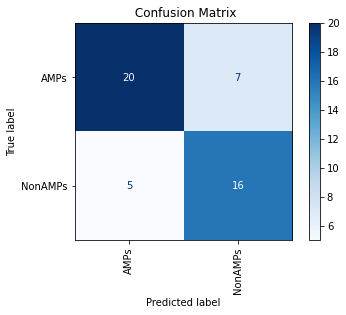

In [122]:

print(classification_report(y_test,pred))
print("Accuracy:"+str(accuracy_score(y_test, pred)))
confusion_Matrix(model, X_test, y_test)

In [ ]:
#for pred in est:
#    plt.plot(y_test, pred, color='r', alpha=0.1)
test_score = np.empty(len(model.estimators_))
for i, pred in enumerate(model.staged_predict(X_test)): 
    test_score[i] = model.loss_(y_test, pred) 
    
plt.plot(np.arange(n_estimators) + 1, test_score, label='Test')
#plt.plot(np.arange(n_estimators) + 1, model.train_score_, label='Train')

## Hyperparameter Tuning
hyperparameters to tune, perhaps the most important are as follows:

* The number of trees or estimators in the model.
* The learning rate of the model.
* The row and column sampling rate for stochastic models.
* The maximum tree depth.
* The minimum tree weight.
* The regularization terms alpha and lambda.

How to configure or tune the configuration of gradient boosting algorithm?

In [130]:
X_train.shape

(33956, 1900)

In [ ]:
#param_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],'n_estimators': [100,200,500,1000],
#              'max_depth': [4, 6], 'min_samples_leaf': [3, 5, 9, 17], 'max_features': [1.0, 0.3, 0.1]}
#est = GradientBoostingClassifier() 
param_grid =  {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
               "n_estimators": [100,200,500,1000],
                 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
                 "min_child_weight" : [ 1, 3, 5, 7 ],
                 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
                 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

XGBmodel = XGBClassifier( n_jobs=10, random_state=42, verbosity=1)
gs_XGBmodel_cv = GridSearchCV(XGBmodel, param_grid, cv=10).fit(X_train,y_train) 
gs_XGBmodel_cv.best_params_

In [ ]:
score = cross_val_score(gs_XGBmodel_cv.best_estimator_, X, y, scoring='accuracy', cv=5).mean()#
print('Cross-Validation Accuracy:', score, '\n', '\n')

In [ ]:
gs_XGBmodel_cv.best_estimator_.save_model('gs_XGBmodel_cv.best_estimator_.model')

In [8]:
XGBmodel = XGBClassifier( n_jobs=10, random_state=42, verbosity=1)
XGBmodel.fit(X_train,y_train) 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=10, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=1)

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      4264
           1       0.91      0.92      0.91      4127

    accuracy                           0.92      8391
   macro avg       0.91      0.92      0.92      8391
weighted avg       0.92      0.92      0.92      8391

Accuracy:0.915028006197116
[[3883  381]
 [ 332 3795]]


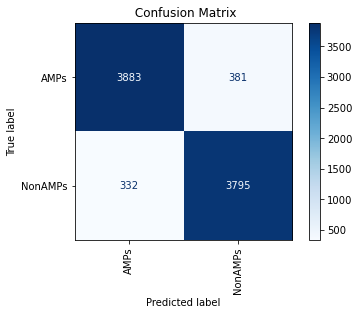

In [11]:
pred = XGBmodel.predict(X_test)
print(classification_report(y_test,pred))
print("Accuracy:"+str(accuracy_score(y_test, pred)))
confusion_Matrix(XGBmodel, X_test, y_test)

In [12]:
# use from fitted
score = cross_val_score(XGBmodel, X, y, scoring='accuracy', cv=10).mean()#
print('Cross-Validation Accuracy:', score, '\n', '\n')

Cross-Validation Accuracy: 0.8130257774303468 
 



In [16]:
XGBmodel = XGBClassifier(n_estimators=500, n_jobs=20, random_state=42, verbosity=1)
score = cross_val_score(XGBmodel, X, y, scoring='accuracy', cv=10).mean()#
print('Cross-Validation Accuracy:', score, '\n', '\n')

Cross-Validation Accuracy: 0.8130257774303468 
 



In [15]:
XGBmodel.save_model( "bestXGBmodel.model")

In [14]:
XGBmodel = XGBClassifier( n_jobs=20, random_state=42, verbosity=1)
cross_val_score(XGBmodel, X, y, cv=10, scoring=scorer )

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

In [15]:

results_XG = scorer.get_results()
for metric in results_XG.keys():
  print("%s: %.3f" % (metric, average(results_XG[metric])))

accuracy: 0.817
precision: 0.775
recall: 0.924
f1: 0.838
roc_auc: 0.819
neg_log_loss: 6.304


# Random Forests in XGBoost

## Evaluate the model